In [216]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
def polyBasis(data,basisDegree):
    length = data.shape[0]
    result = np.ones((length,1))
    for p in range(1,basisDegree+1):
        nthData = pow(data,p).reshape((length,1))
        result = np.concatenate((result, nthData),1)
    return result

In [214]:
def generateData(data, function, nf):
    result = []
    for datum in data:
        y = 0
        for (i, val) in enumerate(function):
            y = y + val * pow(datum,i)
        #noise = random.random() * nf
        noise = math.sin(datum) * nf
        y = y + noise
        result.append(y)
    return result

In [286]:
X = np.linspace(-5,12,60)
noise = 5000
model = [7,4,-1,10,-1]
y = generateData(X, model, 0) 
#display(x)
#display(y)

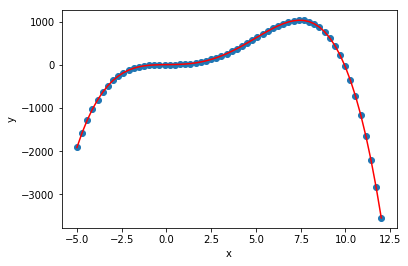

array([ 7.,  4., -1., 10., -1.])

In [291]:
Z = polyBasis(X,4)
first_term = np.linalg.inv(np.matmul(Z.T, Z))
second_term = np.matmul(Z.T,y)
w = np.matmul(first_term, second_term)
yhat = np.matmul(Z,w)

fig = plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, y, 'o', figure=fig, label='data')
plt.plot(X, yhat, 'r', figure=fig, label = 'regression')
plt.show()
display(w)

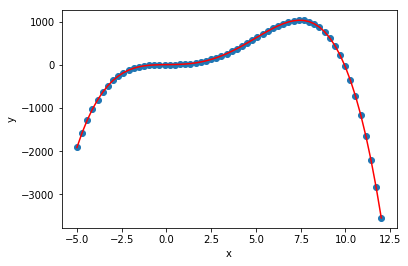

array([ 7.,  4., -1., 10., -1.])

In [292]:
w2,resid,rank,sigma = np.linalg.lstsq(Z,y)
yhat2 = np.matmul(Z,w2)
fig = plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, y, 'o', figure=fig, label='data')
plt.plot(X, yhat2, 'r', figure=fig, label = 'regression')
plt.show()
display(w2)

In [240]:
rank

6